<a href="https://colab.research.google.com/github/eddychetz/Data-Analytics-and-Visualization-Capstone-Project-with-Python/blob/main/EDA_Data_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab: Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Load the dataset into a dataframe.


In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/Capstone_edX/Module%203/Survey_data.csv")
df.head()

,Unnamed: 0,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,NormalizedAnnualCompensation
0,9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,GBP,Microsoft SQL Server,Microsoft SQL Server,"Database administrator;Developer, full-stack;D...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,White or of European descent,Man,Flex time or a flexible schedule;How widely us...,Very satisfied,"I’m not actively looking, but I am open to new...",HTML/CSS;Java;JavaScript;Python;R;SQL,HTML/CSS;Java;JavaScript;Python;SQL,Pandas;TensorFlow,Pandas,Github;Microsoft Teams,Github;Microsoft Teams,No,Neutral,Fairly important,Curious about other opportunities;Better compe...,Company reviews from third party sites (e.g. G...,Every few months,Yes,Onboarding? What onboarding?,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow,Windows,2 to 9 employees,Android;Linux;Raspberry Pi;Windows,Android;Linux;Raspberry Pi;Windows,I have a great deal of influence,Straight / Heterosexual,Yes,"Yes, definitely",Multiple times per day,Multiple times per day,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4,25000.0
1,32,33,I am a developer by profession,Yes,39.0,14,Monthly,4900.0,63564.0,Belgium,European Euro,EUR,MongoDB,MongoDB;MySQL;PostgreSQL;SQLite,"Developer, front-end;Developer, full-stack;Dev...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,Flex time or a flexible schedule;Remote work o...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,Node.js;React Native;Unity 3D,Node.js;React Native,"Github;Slack;Google Suite (Docs, Meet, etc);St...",Confluence;Jira;Github;Gitlab;Slack;Google Sui...,Yes,Neutral,Somewhat important,Just because;Curious about other opportunities...,Company reviews from third party sites (e.g. G...,Once a year,No,No,No,Sometimes: 1-2 days per month but less than we...,Ask developers I know/work with;Visit develope...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,500 to 999 employees,Docker;Google Cloud Platform;iOS;Kubernetes;MacOS,AWS;Docker;Google Cloud Platform;Heroku;iOS;Ku...,I have some influence,Straight / Heterosexual,Yes,Neutral,Less than once per month or monthly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;Gatsby;React.js;Ruby on Rails,Angular;Angular.js;Django;Express;React.js,Just as welcome now as I felt last year,40.0,20,14,58800.0
2,41,42,I am a developer by profession,No,32.0,14,Yearly,130000.0,130000.0,United States,United States dollar,USD,Cassandra;DynamoDB;MongoDB,Microsoft SQL Server;MySQL;Oracle;Redis,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,Remote work options;How widely used or impactf...,Very sat

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


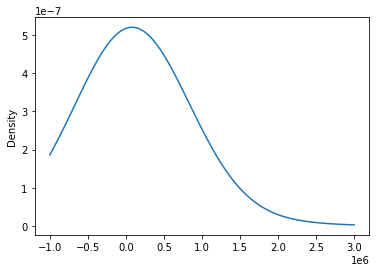

In [ ]:
# your code goes here
import matplotlib.pyplot as plt
import scipy.stats.kde as kde
df_plot = df['ConvertedComp']
df_plot.plot.kde(bw_method=3)
plt.show()

Plot the histogram for the column `ConvertedComp`.


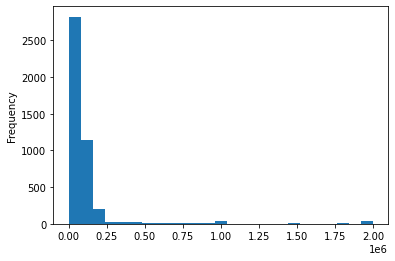

In [ ]:
# your code goes here
df_plot.plot(kind='hist', bins=25)
plt.show()

What is the median of the column `ConvertedComp`?


In [ ]:
# your code goes here
print(df_plot.median())

60505.0


How many responders identified themselves only as a **Man**?


In [ ]:
# your code goes here
df['Gender'].value_counts()['Man']

4184

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [ ]:
# your code goes here
df_woman = df[df.Gender=='Woman']
df_woman.ConvertedComp.median()

59454.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [ ]:
# your code goes here
df.Age.describe().to_frame()[3:8]

,Age
min,17.0
25%,27.0
50%,30.0
75%,36.0
max,70.0


Plot a histogram of the column `Age`.


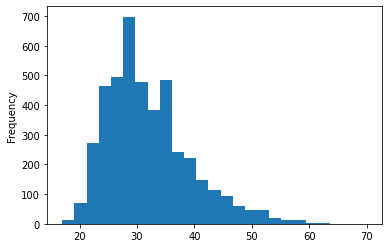

In [ ]:
# your code goes here
df.Age.plot(kind='hist', bins=25)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


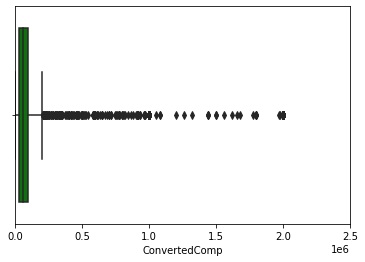

In [ ]:
# your code goes here
import seaborn as sns
sns.boxplot(df_plot, color='g')
plt.xlim(0,2500000)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [ ]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

69844.0


Find out the upper and lower bounds.


In [ ]:
# your code goes here
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print('Lower bound: ', lower, '\nUpper bound: ', upper)


Lower bound:  -74610.0 
Upper bound:  204766.0


Identify how many outliers are there in the `ConvertedComp` column.


In [ ]:
# number of outliers below the lower bound
df_outliers_blw = df.loc[(df.ConvertedComp < lower)]
df_outliers_blw.ConvertedComp.count()

0

In [ ]:
# number of outliers above the upper bound
df_outliers_abv = df.loc[(df.ConvertedComp > upper)]
df_outliers_abv.ConvertedComp.count()

266

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [ ]:
# your code goes here
df_in = df.loc[(Q1-1.5*IQR<df.ConvertedComp) & (df.ConvertedComp<Q3+1.5*IQR)]
df_in.head()

,Age,Respondent,MainBranch,Hobbyist,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,NormalizedAnnualCompensation
0,22.0,10,I am a developer by profession,Yes,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,GBP,Microsoft SQL Server,Microsoft SQL Server,"Database administrator;Developer, full-stack;D...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,White or of European descent,Man,Flex time or a flexible schedule;How widely us...,Very satisfied,"I’m not actively looking, but I am open to new...",HTML/CSS;Java;JavaScript;Python;R;SQL,HTML/CSS;Java;JavaScript;Python;SQL,Pandas;TensorFlow,Pandas,Github;Microsoft Teams,Github;Microsoft Teams,No,Neutral,Fairly important,Curious about other opportunities;Better compe...,Company reviews from third party sites (e.g. G...,Every few months,Yes,Onboarding? What onboarding?,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow,Windows,2 to 9 employees,Android;Linux;Raspberry Pi;Windows,Android;Linux;Raspberry Pi;Windows,I have a great deal of influence,Straight / Heterosexual,Yes,"Yes, definitely",Multiple times per day,Multiple times per day,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4,25000.0
1,39.0,33,I am a developer by profession,Yes,14,Monthly,4900.0,63564.0,Belgium,European Euro,EUR,MongoDB,MongoDB;MySQL;PostgreSQL;SQLite,"Developer, front-end;Developer, full-stack;Dev...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,Flex time or a flexible schedule;Remote work o...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,Node.js;React Native;Unity 3D,Node.js;React Native,"Github;Slack;Google Suite (Docs, Meet, etc);St...",Confluence;Jira;Github;Gitlab;Slack;Google Sui...,Yes,Neutral,Somewhat important,Just because;Curious about other opportunities...,Company reviews from third party sites (e.g. G...,Once a year,No,No,No,Sometimes: 1-2 days per month but less than we...,Ask developers I know/work with;Visit develope...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,500 to 999 employees,Docker;Google Cloud Platform;iOS;Kubernetes;MacOS,AWS;Docker;Google Cloud Platform;Heroku;iOS;Ku...,I have some influence,Straight / Heterosexual,Yes,Neutral,Less than once per month or monthly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;Gatsby;React.js;Ruby on Rails,Angular;Angular.js;Django;Express;React.js,Just as welcome now as I felt last year,40.0,20,14,58800.0
2,32.0,42,I am a developer by profession,No,14,Yearly,130000.0,130000.0,United States,United States dollar,USD,Cassandra;DynamoDB;MongoDB,Microsoft SQL Server;MySQL;Oracle;Redis,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,Remote work options;How widely used or impactf...,Very satisfied,"I’m not act

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [ ]:
df=df[['Age','Respondent', 'MainBranch', 'Hobbyist',
       'Age1stCode', 'CompFreq', 'CompTotal', 'ConvertedComp', 'Country',
       'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear',
       'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity',
       'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageDesireNextYear',
       'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
       'WebframeWorkedWith', 'WelcomeChange', 'WorkWeekHrs', 'YearsCode',
       'YearsCodePro', 'NormalizedAnnualCompensation']]

In [ ]:
# your code goes here
df.corr(method='pearson')

,Age,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,NormalizedAnnualCompensation
Age,1.000000,-0.007600,0.004144,0.093098,0.031990,-0.020290
Respondent,-0.007600,1.000000,-0.014262,0.004586,0.013355,-0.006012
CompTotal,0.004144,-0.014262,1.000000,-0.013292,0.019028,0.544287
ConvertedComp,0.093098,0.004586,-0.013292,1.000000,0.058915,-0.019895
WorkWeekHrs,0.031990,0.013355,0.019028,0.058915,1.000000,0.013339
NormalizedAnnualCompensation,-0.020290,-0.006012,0.544287,-0.019895,0.013339,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
